In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc",size=12)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_1218 = pd.read_pickle('ptt_1218_new.pkl')
df_1225 = pd.read_pickle('ptt_1225_new.pkl')
df_1227 = pd.read_pickle('ptt_1227_new.pkl')

In [3]:
df_1218.head()

,tag,userid,text,others,time,date,ip,sentiment_lr,sentiment_nb,sentiment_snow,country,city
0,推,gn02160940,來了,180.218.16.139 12/18 19:00,19:00,12/18,180.218.16.139,neg,neg,0.645161,Taiwan,Taipei
1,推,mnhyuiop,我第一,114.32.93.156 12/18 19:00,19:00,12/18,114.32.93.156,neg,neg,0.550351,Taiwan,Danshui District
2,推,rockon15,https,1.161.230.117 12/18 19:00,19:00,12/18,1.161.230.117,neg,neg,0.500000,Taiwan,Banqiao District
3,推,ianenix,挖石油挖起來,175.182.10.209 12/18 19:00,19:00,12/18,175.182.10.209,neg,neg,0.395302,Taiwan,Zhongli District
4,推,GentleJena,亞利安星球辯論法,61.227.136.218 12/18 19:00,19:00,12/18,61.227.136.218,neg,neg,0.237397,Taiwan,Taipei


## 結巴斷字斷詞

In [4]:
import nltk
import jieba
from wordcloud import WordCloud 
from nltk.corpus import stopwords
jieba.set_dictionary('/Users/andy/Documents/python/校外課程&自我學習/jieba//dict.txt.big.txt')
stop=stopwords.words('/Users/andy/Documents/python/校外課程&自我學習/jieba/stop_words2.txt')

In [6]:
# 自定義字典
jieba.load_userdict('自定義字典.txt')

In [7]:
def jieba_split(df):
    jieba_text = []
    for index in tqdm_notebook(range(len(df))):
        words = jieba.cut(str(df['text'][index]))
        text = ''
        for word in words:
            if word not in stop:
                text += " "+word
        jieba_text.append(text)
    df['jieba_text'] = pd.DataFrame(jieba_text)
    return df

In [8]:
df_1218 = jieba_split(df_1218)
df_1225 = jieba_split(df_1225)
df_1227 = jieba_split(df_1227)

In [9]:
def candidate_text(df, date, start, end):
    temp = df[(df['date'] >= date) & (df['time'] >= start) & (df['time'] <= end)]
    text = []
    for i in temp.index:
        for j in temp['jieba_text'][i].split(' '):
            if j != '':
                text.append(j)
    return text

In [10]:
# 韓國瑜
han_1218_1 = candidate_text(df_1218, '12/18', '19:03', '19:12')
han_1218_2 = candidate_text(df_1218, '12/18', '19:32', '19:42')
han_1218_3 = candidate_text(df_1218, '12/18', '20:02', '20:12')
han_1225_1 = candidate_text(df_1225, '12/25', '14:15', '14:25')
han_1225_2 = candidate_text(df_1225, '12/25', '14:45', '14:55')
han_1225_3 = candidate_text(df_1225, '12/25', '15:15', '15:25')
han_1227_1 = candidate_text(df_1227, '12/27', '19:13', '19:23')
han_1227_2 = candidate_text(df_1227, '12/27', '19:43', '19:53')
han_1227_3 = candidate_text(df_1227, '12/27', '20:13', '20:23')

In [11]:
# 蔡英文
tsai_1218_1 = candidate_text(df_1218, '12/18', '19:22', '19:32')
tsai_1218_2 = candidate_text(df_1218, '12/18', '19:52', '20:02')
tsai_1218_3 = candidate_text(df_1218, '12/18', '20:22', '20:32')
tsai_1225_1 = candidate_text(df_1225, '12/25', '14:05', '14:15')
tsai_1225_2 = candidate_text(df_1225, '12/25', '14:35', '14:45')
tsai_1225_3 = candidate_text(df_1225, '12/25', '15:05', '15:15')
tsai_1227_1 = candidate_text(df_1227, '12/27', '19:23', '19:33')
tsai_1227_2 = candidate_text(df_1227, '12/27', '19:53', '20:03')
tsai_1227_3 = candidate_text(df_1227, '12/27', '20:23', '20:33')

In [12]:
# 宋楚瑜
soong_1218_1 = candidate_text(df_1218, '12/18', '19:12', '19:22')
soong_1218_2 = candidate_text(df_1218, '12/18', '19:42', '19:52')
soong_1218_3 = candidate_text(df_1218, '12/18', '20:12', '20:22')
soong_1225_1 = candidate_text(df_1225, '12/25', '14:25', '14:35')
soong_1225_2 = candidate_text(df_1225, '12/25', '14:55', '15:05')
soong_1225_3 = candidate_text(df_1225, '12/25', '15:25', '15:35')
soong_1227_1 = candidate_text(df_1227, '12/27', '19:03', '19:13')
soong_1227_2 = candidate_text(df_1227, '12/27', '19:33', '19:43')
soong_1227_3 = candidate_text(df_1227, '12/27', '20:03', '20:13')

In [16]:
from collections import Counter
Counter(han_1218_3).most_common()[:10]

[('真的', 74),
 ('高雄', 67),
 ('政見', 66),
 ('好', 60),
 ('說', 51),
 ('喝酒', 50),
 ('幹', 44),
 ('選', 44),
 ('萬歲', 41),
 ('總統', 37)]

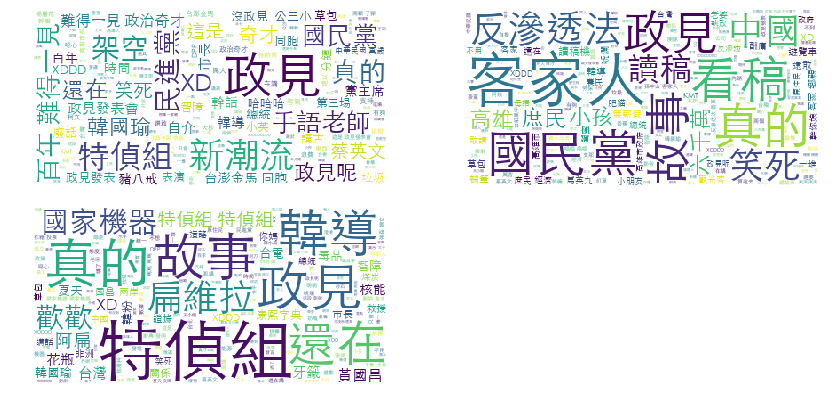

In [79]:
#文字雲
plt.subplot(321)
word = (" ").join(han_1227_1)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.gcf().set_size_inches(12,8)
plt.tight_layout(pad=0)
# plt.title('han_1218_1')
plt.axis('off')

plt.subplot(322)
word = (" ").join(han_1227_2)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
# plt.title('han_1218_2')
plt.axis('off')

plt.subplot(323)
word = (" ").join(han_1227_3)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
# plt.title('han_1218_3')
plt.axis('off')
plt.show()

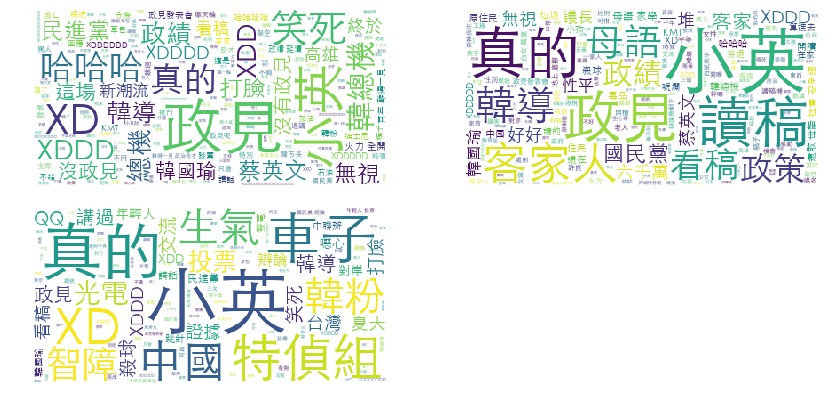

In [80]:
#文字雲
plt.subplot(321)
word = (" ").join(tsai_1227_1)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.gcf().set_size_inches(12,8)
plt.tight_layout(pad=0)
# plt.title('tsai_1218_1')
plt.axis('off')

plt.subplot(322)
word = (" ").join(tsai_1227_2)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
# plt.title('tsai_1218_2')
plt.axis('off')

plt.subplot(323)
word = (" ").join(tsai_1227_3)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
# plt.title('tsai_1218_3')
plt.axis('off')
plt.show()

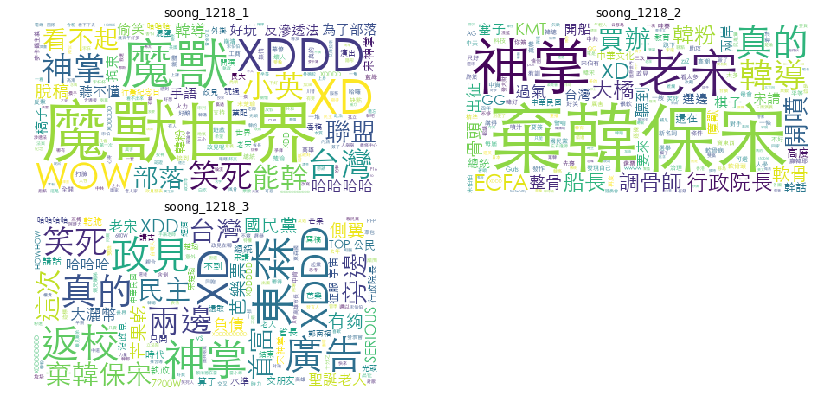

In [82]:
#文字雲
plt.subplot(321)
word = (" ").join(soong_1225_1)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.gcf().set_size_inches(12,8)
plt.tight_layout(pad=0)
plt.title('soong_1218_1')
plt.axis('off')

plt.subplot(322)
word = (" ").join(soong_1225_2)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
plt.title('soong_1218_2')
plt.axis('off')

plt.subplot(323)
word = (" ").join(soong_1225_3)
wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(word)
plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
plt.tight_layout(pad=0)
plt.title('soong_1218_3')
plt.axis('off')
plt.show()

In [165]:
import random
def custom_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return fig_color % random.randint(40, 70)

def word_cloud(seg_list):
    
    font_path = 'r"/System/Library/Fonts/STHeiti Light.ttc"'
    seg_list = (" ").join(seg_list)
    wc = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",width=1500, height=860).generate(seg_list)
    plt.imshow(wc.recolor(color_func=custom_color_func), interpolation="bilinear")
    plt.axis('off')
    plt.show()

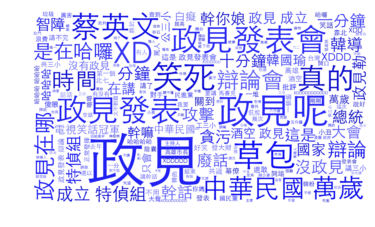

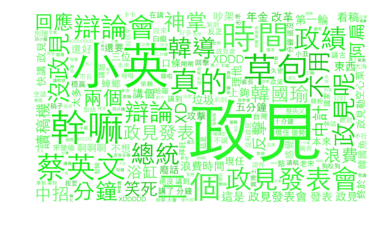

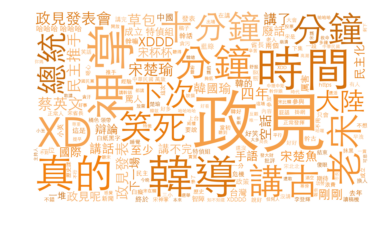

In [167]:
fig_color='hsl(240, 90%%, %d%%)'
word_cloud(han_1218_1)
plt.show()

fig_color='hsl(120, 90%%, %d%%)'
word_cloud(tsai_1218_1)
plt.show()

fig_color='hsl(30, 90%%, %d%%)'
word_cloud(soong_1218_1)
plt.show()

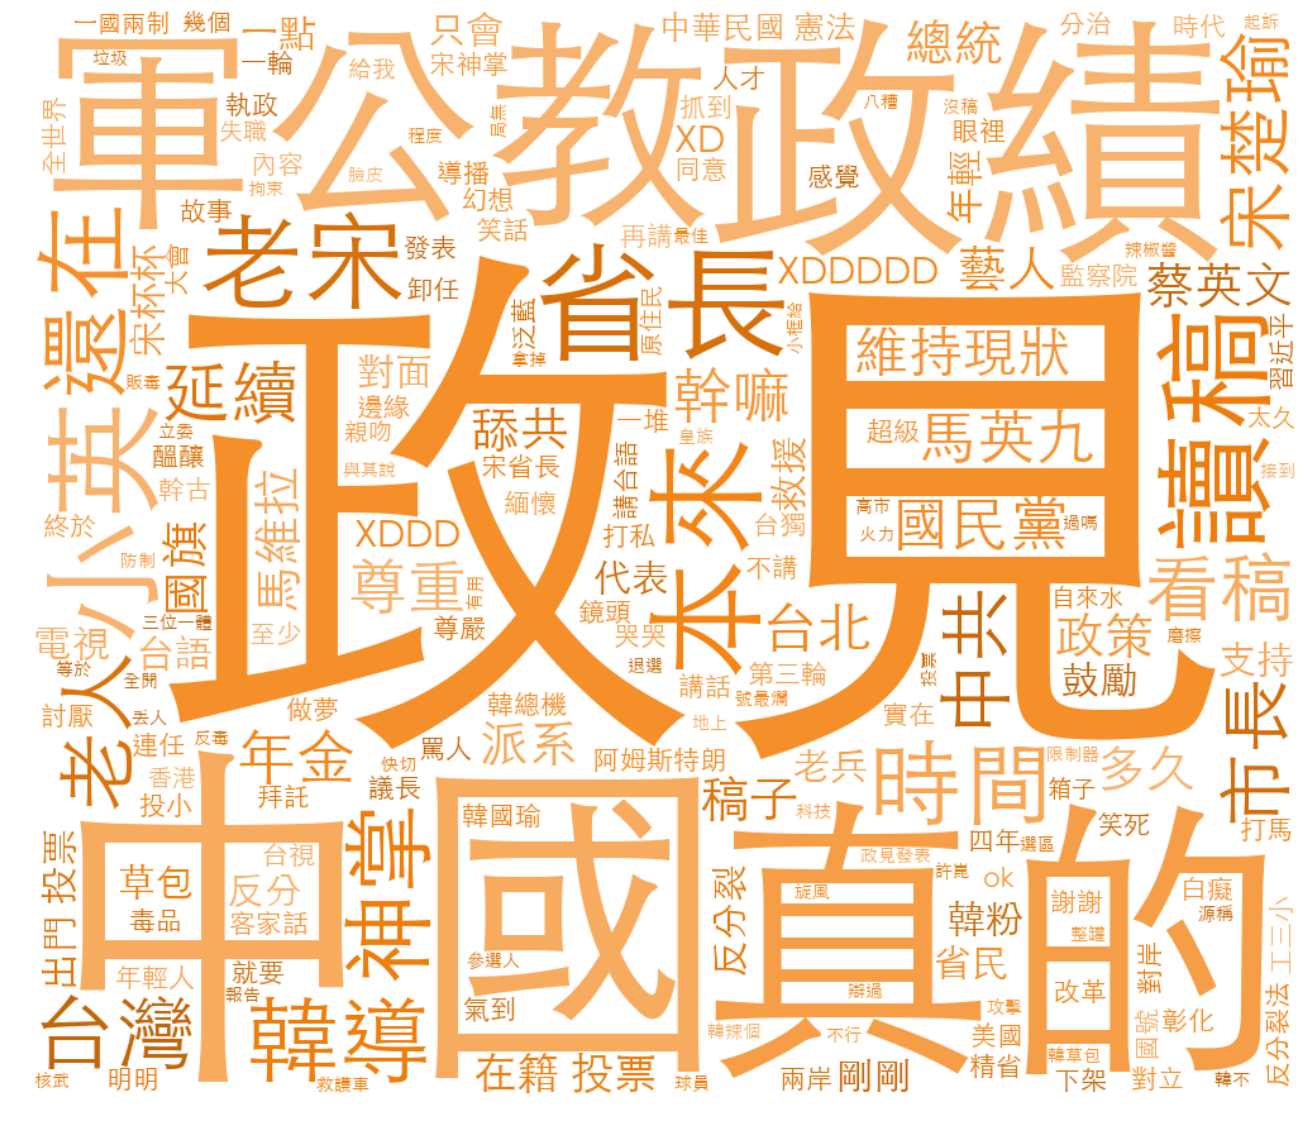

In [281]:
fig_color='hsl(30, 90%%, %d%%)'
seg_list = (" ").join(soong_1227_3)
wc = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",width=1000, height=860).generate(seg_list).recolor(color_func=custom_color_func)
plt.figure(figsize = (30,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('./image/soong_1227_3.png', bbox_inches='tight')

### 情緒

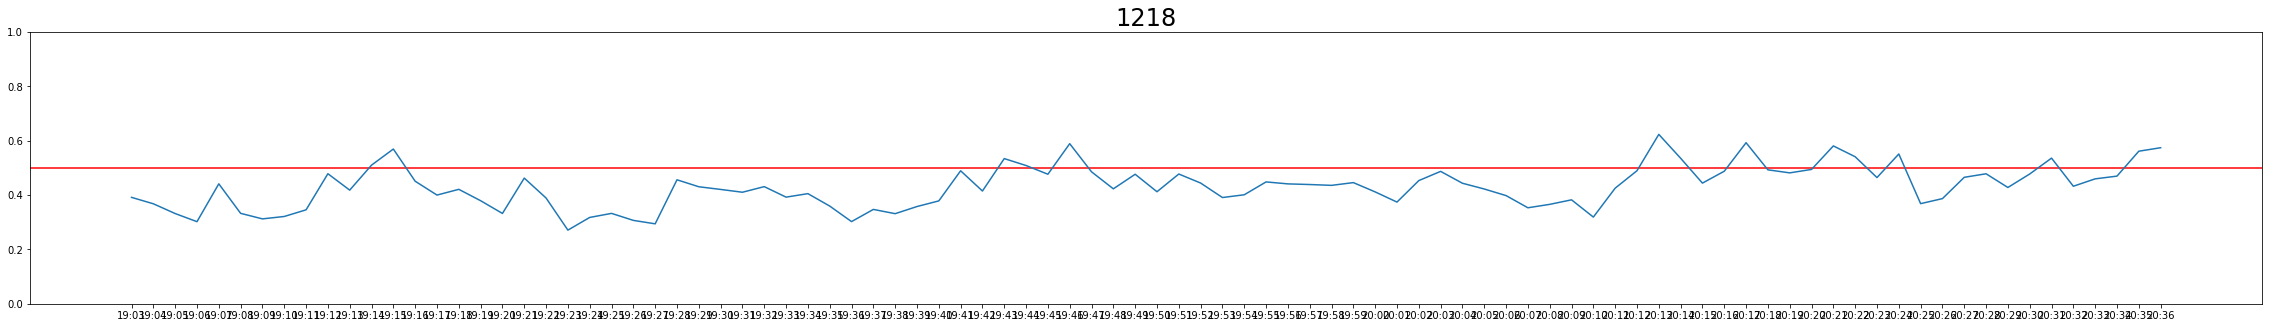

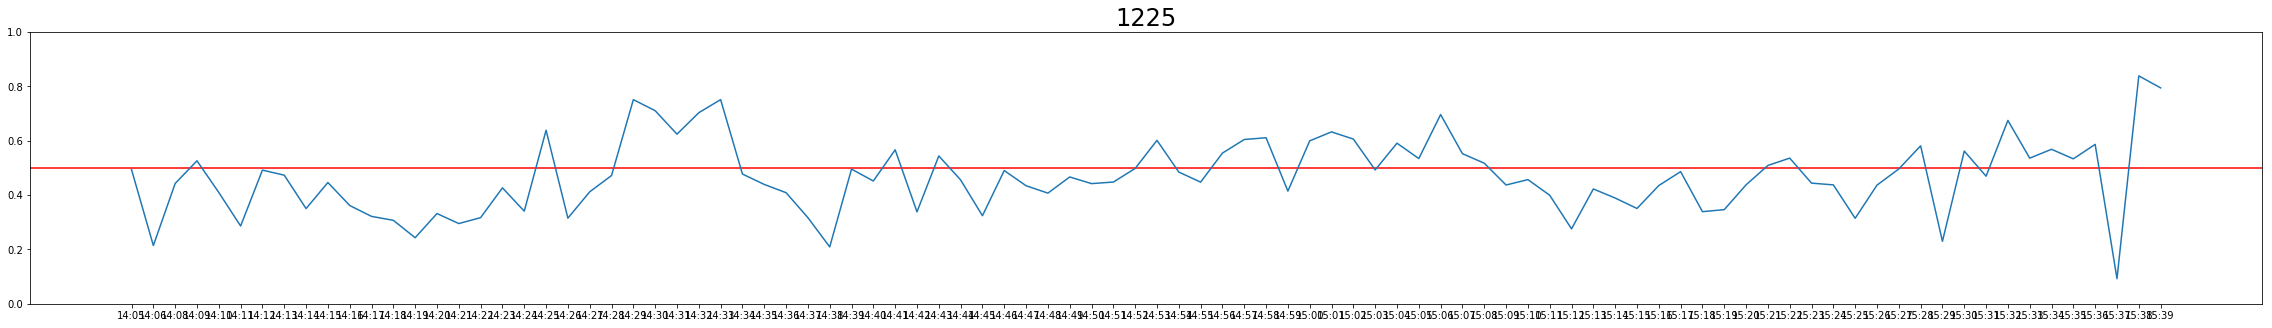

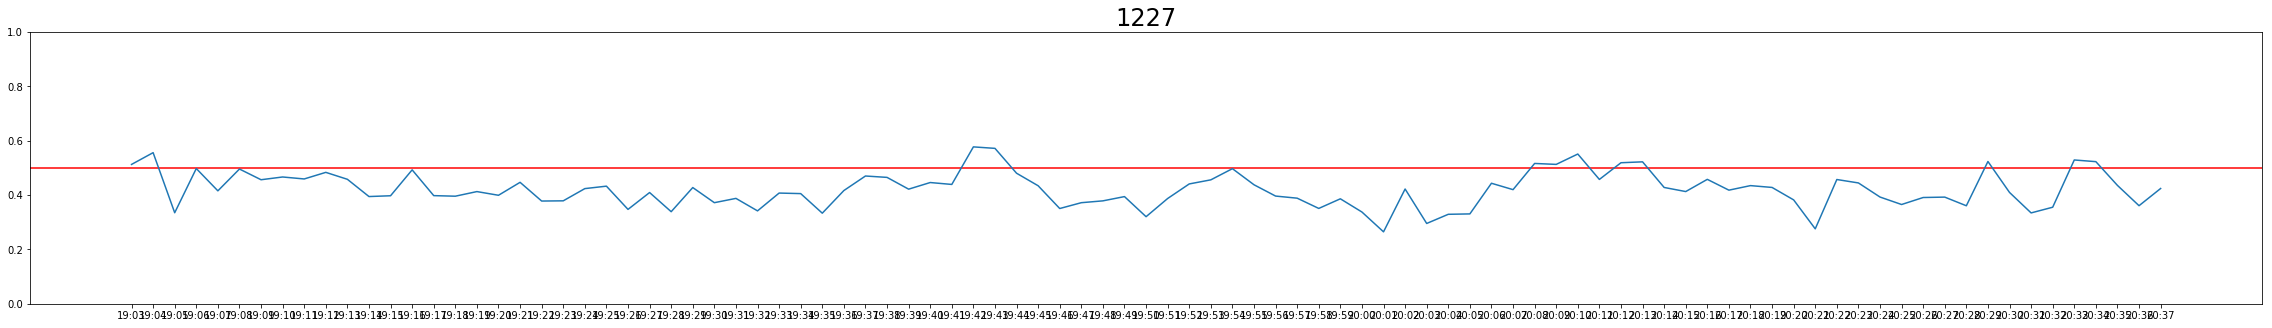

In [105]:
temp = df_1218[(df_1218['date']=='12/18 ') & (df_1218['time'] > '19:02') & (df_1218['time'] < '20:37')]
temp = temp.groupby(['date','time'])['sentiment_snow'].mean().reset_index()
temp.set_index("time", inplace = True) 
temp = temp.drop('date', axis=1)
plt.gcf().set_size_inches(40,5)
plt.title('1218', fontsize=24)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylim(0,1)
plt.plot(temp)
plt.show()

temp = df_1225[(df_1225['date']=='12/25 ') & (df_1225['time'] > '14:04') & (df_1225['time'] < '15:40')]
temp = temp.groupby(['date','time'])['sentiment_snow'].mean().reset_index()
temp.set_index("time", inplace = True) 
temp = temp.drop('date', axis=1)
plt.gcf().set_size_inches(40,5)
plt.title('1225', fontsize=24)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylim(0,1)
plt.plot(temp)
plt.show()

temp = df_1227[(df_1227['date']=='12/27 ') & (df_1227['time'] > '19:02') & (df_1227['time'] < '20:38')]
temp = temp.groupby(['date','time'])['sentiment_snow'].mean().reset_index()
temp.set_index("time", inplace = True) 
temp = temp.drop('date', axis=1)
plt.gcf().set_size_inches(40,5)
plt.title('1227', fontsize=24)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.ylim(0,1)
plt.plot(temp)
plt.show()

In [144]:
df_total = pd.concat([df_1218, df_1225, df_1227]).reset_index(drop=True)
df_total.groupby('candidate')['sentiment_snow'].mean()

candidate
宋楚瑜    0.491079
蔡英文    0.406077
韓國瑜    0.398811
Name: sentiment_snow, dtype: float64

### IP

In [220]:
df_total['city'].value_counts()[:10]

Taipei              6009
Banqiao District    1562
Taichung            1103
Kaohsiung City      1095
Taoyuan District     994
Tainan City          867
Zhongli District     865
Changhua City        389
Pingtung City        341
Yilan                322
Name: city, dtype: int64

In [182]:
df_1218.iloc[[33,38,8816,8824]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
33,→,ash9911911,發財發財 發大財,19:02,12/18,112.105.151.69,0.986954,Taiwan,Taipei
38,推,Summer1308,征服宇宙,19:02,12/18,36.226.180.99,0.985406,Taiwan,Zhubei City
8816,噓,tengentoppa,垃圾互咬,02:37,12/19,101.137.6.170,0.037813,Taiwan,Taipei
8824,噓,hohohoha,政見發表會 沒看幾個政見 都在互酸...,06:57,12/19,1.172.239.211,0.004824,Taiwan,Taipei


In [195]:
df_1225.iloc[[364,366,375,397,398,405,411,414]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
364,噓,Monchestnut,魔獸世界 XD,14:29,12/25,111.241.3.194,0.998425,Taiwan,Taipei
366,推,nba887215,魔獸世界XDD,14:29,12/25,59.120.147.13,0.992174,Taiwan,Banqiao District
375,推,BaGaJohn5566,魔獸世界XDDD,14:29,12/25,39.10.226.218,0.992174,Taiwan,Zhongli District
397,推,a7952609,魔獸世界耶 哇嗚,14:30,12/25,121.254.64.233,0.974389,Taiwan,Taichung
398,推,socotia,打魔獸囉,14:30,12/25,117.19.227.96,0.932337,Taiwan,Taipei
405,→,ffxx,魔獸世界XDDDDDDDDDDD,14:30,12/25,114.32.23.76,0.992174,Taiwan,Taipei
411,推,akanishi901,乾 我就不信神掌有玩過魔獸XDDD,14:30,12/25,59.127.47.130,0.973596,Taiwan,Banqiao District
414,推,himoiscoming,魔獸出現了XDDD,14:30,12/25,210.68.186.140,0.986743,Taiwan,Taipei


In [202]:
df_1218.iloc[[6826,6854,6859,6867,6882,6922,6925,7261]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
6826,→,maydayyun,全民大悶鍋XDDDDDDD,20:11,12/18,114.137.164.60,0.790366,Taiwan,Zhongli District
6854,→,pearlwhite,全民大悶鍋XDD,20:12,12/18,223.137.52.109,0.790366,Taiwan,Taoyuan District
6859,→,zreh44,全民大悶鍋哈哈哈哈哈哈哈哈哈哈哈,20:12,12/18,111.185.176.124,0.998863,Taiwan,Taipei
6867,推,RIVERWIND,全民大悶鍋 XDD,20:12,12/18,49.159.134.239,0.790366,Taiwan,Keelung
6882,噓,poo731013,全民大悶鍋XDDD,20:12,12/18,223.139.180.62,0.790366,Taiwan,Tainan City
6922,→,maydayyun,來日無多 全民大悶鍋 我快笑死,20:12,12/18,114.137.164.60,0.221652,Taiwan,Zhongli District
6925,→,s20031248,感謝全民大悶鍋贊助播出,20:12,12/18,220.129.152.210,0.904246,Taiwan,Banqiao District
7261,推,ocf951753,全民大悶鍋真的笑爆,20:13,12/18,101.15.211.92,0.664433,Taiwan,Tainan City


In [205]:
df_1225.iloc[[290,294,299,301,302]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
290,→,cloudin,聖誕快樂www,14:23,12/25,203.145.212.240,0.686440,Taiwan,Jiaoxi Township
294,推,geniusw,再次祝福大家聖誕快樂,14:23,12/25,165.225.116.217,0.961459,Hong Kong,Hong Kong
299,推,psl7634,聖誕快樂XDDD,14:23,12/25,110.50.140.34,0.686440,Taiwan,Banqiao District
301,推,phoinixa,再次祝福大家聖誕快樂,14:23,12/25,123.204.199.5,0.961459,Taiwan,Taipei
302,推,RisingTackle,真他媽跳tone 祝大家聖誕快樂,14:23,12/25,1.34.254.137,0.827982,Taiwan,Hualien City


In [286]:
df_1225.iloc[[553,555,556,561,568,571,575,581]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
553,推,joe10227,貓英大統領砲火全開呀XDD,14:38,12/25,1.34.136.235,0.060213,Taiwan,Taipei
555,推,yisdl,蔡英文不看稿 火力只會更強而已 一堆呆子,14:38,12/25,114.42.222.2,0.619791,Taiwan,Taipei
556,推,psl7634,韓的團隊超廢 連稿都不寫 讀稿都不會,14:38,12/25,110.50.140.34,0.008129,Taiwan,Banqiao District
561,推,gaym19,嗆完人後當然講政見啊 不然學人罵10分鐘,14:39,12/25,111.241.13.186,0.644639,Taiwan,Taoyuan District
568,推,maple829403,她就在等脫稿吧XD,14:39,12/25,61.64.103.113,0.818231,Taiwan,Taipei
571,推,jack2324,稿子是拘束器啊，還有人不知道？,14:39,12/25,118.160.122.71,0.264304,Taiwan,Taipei
575,推,a251012002,小英這段說得不錯！,14:39,12/25,111.246.145.222,0.408679,Taiwan,Taipei
581,推,phoinixa,落伍的觀念 直接嘴,14:40,12/25,123.204.199.5,0.895950,Taiwan,Taipei


In [9]:
df_1225.iloc[[532,539,541,542,552]][['tag', 'userid', 'text', 'time', 'date', 'ip', 'sentiment_snow', 'country', 'city']]

,tag,userid,text,time,date,ip,sentiment_snow,country,city
532,→,jurassic,快點把讀稿機還給她,14:36,12/25,61.239.35.62,0.142288,Hong Kong,Tiu Keng Leng
539,推,pttyzf,不反擊就變成心虛說不出話來,14:36,12/25,114.39.105.162,0.019769,Taiwan,Taipei
541,推,RisingTackle,明明一直低頭看稿 目小嗎？,14:36,12/25,1.34.254.137,0.016894,Taiwan,Hualien City
542,→,hunder31,政見好嗎....,14:36,12/25,111.240.8.120,0.046629,Taiwan,Taipei
552,→,Goog1e,讀稿機,14:37,12/25,59.115.124.213,0.197133,Taiwan,Taipei
